In [22]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB 
from sklearn import tree 
from sklearn import svm
from sklearn import model_selection

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [108]:
import os
print (os.getcwd())
os.chdir('/Users/enzo/Desktop/Jupyter/final project')

/Users/enzo/Desktop/Jupyter/final project


In [109]:
churn = pd.read_csv("customer_churn.csv")
len(churn)

3333

In [110]:
churn.columns = churn.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('?','').str.replace('\'','')
churn.churn.replace(['True.','False.'], [1, 0], inplace=True)
churn.intl_plan.replace(['yes','no'], [1, 0], inplace=True)
churn.vmail_plan.replace(['yes','no'], [1, 0], inplace=True)
churn.drop(['state','phone','day_charge','night_charge','eve_charge','intl_charge'],axis=1, inplace=True)

In [105]:
churn

,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,eve_mins,eve_calls,night_mins,night_calls,intl_mins,intl_calls,custserv_calls,churn
0,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
5,118,510,1,0,0,223.4,98,220.6,101,203.9,118,6.3,6,0,0
6,121,510,0,1,24,218.2,88,348.5,108,212.6,118,7.5,7,3,0
7,147,415,1,0,0,157.0,79,103.1,94,211.8,96,7.1,6,0,0
8,117,408,0,0,0,184.5,97,351.6,80,215.8,90,8.7,4,1,0
9,141,415,1,1,37,258.6,84,222.0,111,326.4,97,11.2,5,0,0


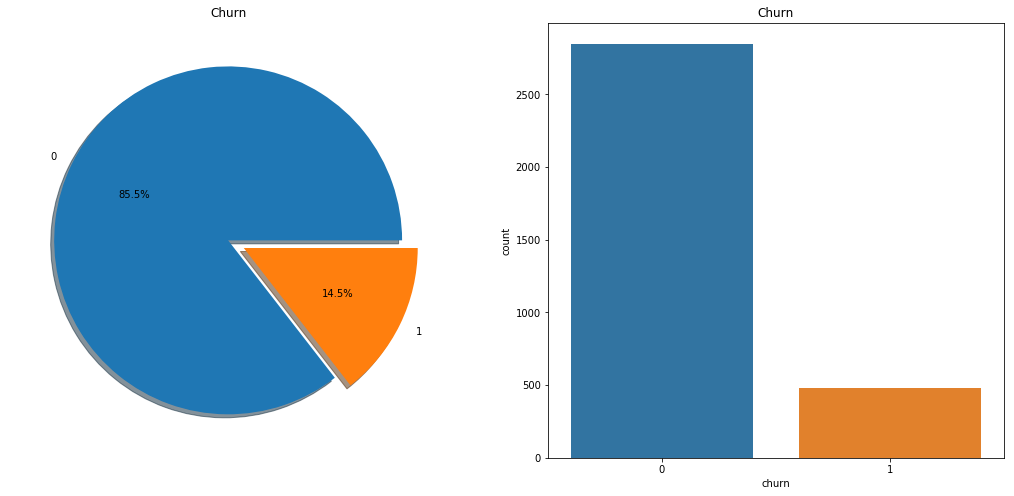

In [111]:
f,ax=plt.subplots(1,2,figsize=(18,8))
churn['churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Churn')
ax[0].set_ylabel('')
sns.countplot('churn',data=churn,ax=ax[1])
ax[1].set_title('Churn')
plt.show()

In [75]:
churn.groupby(['area_code','churn'])['churn'].count()

area_code  churn
408        0         716
           1         122
415        0        1419
           1         236
510        0         715
           1         125
Name: churn, dtype: int64

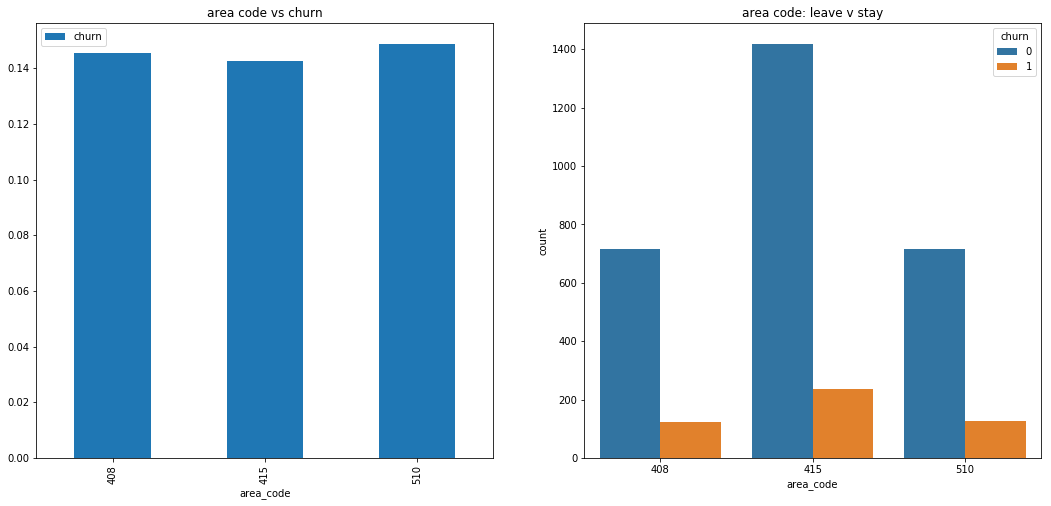

In [76]:
f,ax=plt.subplots(1,2,figsize=(18,8))
churn[['area_code','churn']].groupby(['area_code']).mean().plot.bar(ax=ax[0])
ax[0].set_title('area code vs churn')
sns.countplot('area_code',hue='churn',data=churn,ax=ax[1])
ax[1].set_title('area code: leave v stay')
plt.show()

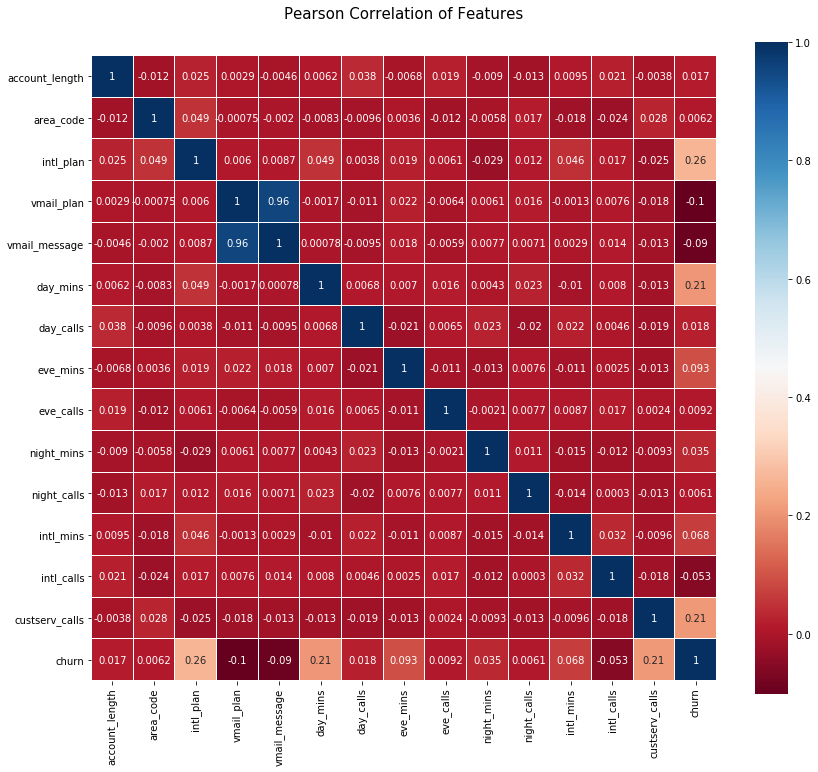

In [106]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(churn.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)